# Kız Başına - Patika dev Bootcamp Projesi

İmregül Kurt

# Airline Passenger Satisfaction Veri Analizi

Bu projede "Airline Passenger Satisfaction" veri seti üzerinden veri analizi uygulamaları yaptım. Bu projedeki amacım veri setindeki sayısal ve kategorik değişkenleri incelemek, eksik ve aykırı değerleri tespit etmek ve temel görselleştirmelerle veri setine dair genel bir bakış elde etmektir.

## 1. Gerekli Kütüphanelerin Yüklenmesi

Analiz boyunca `pandas`, `matplotlib` ve `seaborn` kütüphanelerini kullanacağım.

## 2. Veri Setinin Yüklenmesi

Analizde kullanacağımız veri seti `train.csv` adlı dosyada yer almakta. İlk adım olarak bu dosyayı `pandas` ile yüklüyoruz ve ilk birkaç satırına göz atıyoruz.

Not: `test.csv` dosyasını kullanmama sebebim `train.csv` dosyasının daha büyük bir dataset içermesi ve yeterli olması.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df = pd.read_csv("dataset/train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


head() komutu ile ilk 5 satırı bastırdık ve herhangi bir sıkıntı olmadığını teyit ettik.

## 3. Veri Setine Genel Bakış

Veri setinde kaç gözlem ve özellik bulunduğuna, sütun türlerine ve eksik değer olup olmadığına dair ilk incelemeyi yapıyoruz.

In [7]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

(103904, 25)

## 4. Sayısal ve Kategorik Değişkenlerin Ayrılması

Sayısal ve kategorik sütunları ayırarak analiz sürecini daha verimli bir hale getireceğiz.

In [9]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print(f"Sayısal sütunlar: {numeric_cols}")
print(f"Kategorik sütunlar: {categorical_cols}")

Sayısal sütunlar: ['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Kategorik sütunlar: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


## 5. İstatistiksel Özet

Sayısal değişkenler için temel istatistikleri (`mean`, `median`, `min`, `max`, `std`) inceliyoruz. Kategorik değişkenlerin ise sınıf dağılımına bakıyoruz.

In [10]:
df[numeric_cols].describe().T
for col in categorical_cols:
    print(f"\n{col}")
    print(df[col].value_counts(dropna=False))


Gender
Gender
Female    52727
Male      51177
Name: count, dtype: int64

Customer Type
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

Type of Travel
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

Class
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

satisfaction
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64


### İstatistiksel Özet - Bazı Görselleştirmeler

Bazı değişkenlerin dağılımını ve merkezi eğilimlerini görselleştirerek daha iyi bir fikir edinmeye çalışıyoruz.

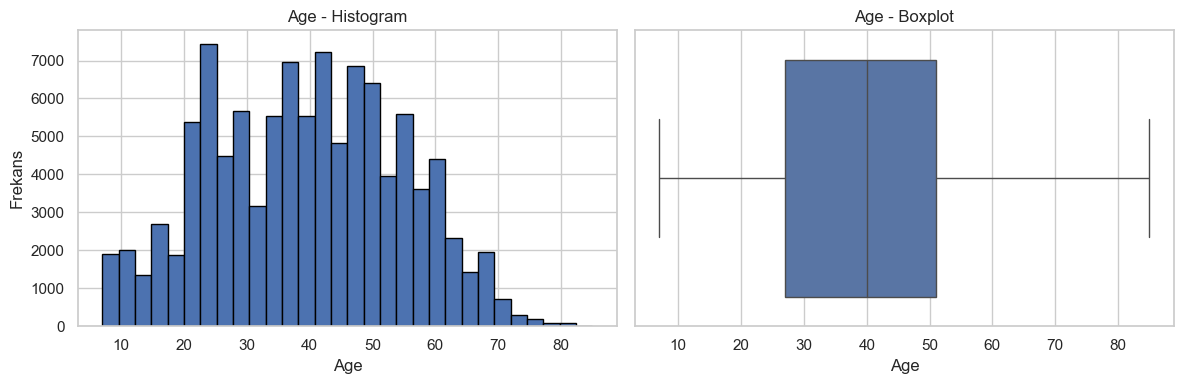

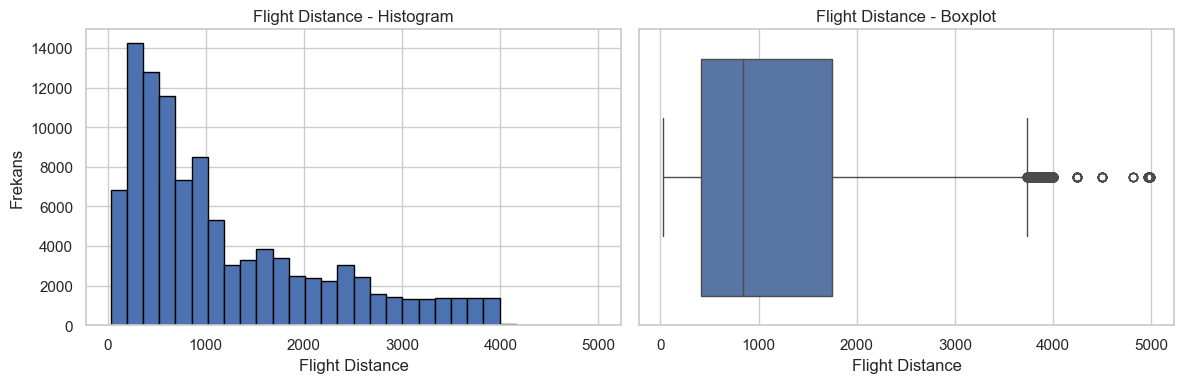

In [22]:
selected_cols = ["Age", "Flight Distance"]

for col in selected_cols:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    df[col].hist(bins=30, edgecolor='black')
    plt.title(f"{col} - Histogram")
    plt.xlabel(col)
    plt.ylabel("Frekans")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


## 6. Temel Yorumlar

Bazı sütunlar hakkında temel gözlemler yapıyoruz. Örneğin yaş dağılımı, uçuş mesafeleri ve gecikme süreleri gibi.

In [11]:
print(f"Ortalama yaş: {df['Age'].mean():.1f}")
print(f"Uçuş mesafesi ortalaması: {df['Flight Distance'].mean():.1f}")
print(f"Ortalama kalkış gecikmesi: {df['Departure Delay in Minutes'].mean():.1f}")
print(f"Ortalama varış gecikmesi: {df['Arrival Delay in Minutes'].mean():.1f}")

Ortalama yaş: 39.4
Uçuş mesafesi ortalaması: 1189.4
Ortalama kalkış gecikmesi: 14.8
Ortalama varış gecikmesi: 15.2


### Temel Yorumlar - Ek

Hizmet olarak birçok kategori olduğu için onları bir arada ele alarak bir inceleme yapıyoruz.

In [14]:
service_columns = ['Inflight wifi service','Departure/Arrival time convenient',
                   'Ease of Online booking','Gate location','Food and drink',
                   'Online boarding','Seat comfort','Inflight entertainment',
                   'On-board service','Leg room service','Baggage handling',
                   'Checkin service','Inflight service','Cleanliness'
]

means = df[service_columns].mean().sort_values(ascending=False)
medians = df[service_columns].median().sort_values(ascending=False)

overall_mean = means.mean()
overall_median = medians.median()

print(f"- Hizmet kategorilerinin ortalama puanlarının genel ortalaması: {overall_mean:.2f}")
print(f"- Medyan puan ortalaması: {overall_median:.2f}")

if overall_mean >= 4:
    print("- Yolcular genel olarak hizmet kalitesinden memnun gibi görünüyor.")
elif overall_mean >= 3:
    print("- Hizmet kalitesi ortalama seviyede, bazı alanlarda iyileştirme gerekebilir.")
else:
    print("- Hizmet kalitesi genel olarak düşük.")

best = means.head(2)
worst = means.tail(2)

print("\n- En yüksek puanlanan hizmet alanları:")
for service, value in best.items():
    print(f"  • {service}: {value:.2f}")

print("\n- En düşük puanlanan hizmet alanları:")
for service, value in worst.items():
    print(f"  • {service}: {value:.2f}")

print(f"\n- Bu sonuçlara göre: '{best.index[0]}' genel memnuniyeti yukarı çeken bir unsurken, '{worst.index[0]}' hizmeti ise kaliteyi aşağı çeken bir unsur olabilir.")


- Hizmet kategorilerinin ortalama puanlarının genel ortalaması: 3.24
- Medyan puan ortalaması: 3.00
- Hizmet kalitesi ortalama seviyede, bazı alanlarda iyileştirme gerekebilir.

- En yüksek puanlanan hizmet alanları:
  • Inflight service: 3.64
  • Baggage handling: 3.63

- En düşük puanlanan hizmet alanları:
  • Ease of Online booking: 2.76
  • Inflight wifi service: 2.73

- Bu sonuçlara göre: 'Inflight service' genel memnuniyeti yukarı çeken bir unsurken, 'Ease of Online booking' hizmeti ise kaliteyi aşağı çeken bir unsur olabilir.


## 7. Eksik Değer Analizi

Veri setinde eksik değer bulunan sütunları belirliyor ve eksik veri oranlarını inceliyoruz.

In [15]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

if missing_counts.empty:
    print("Eksik değer yok.")
else:
    print(missing_counts)
    (missing_counts / len(df) * 100).round(2)

Arrival Delay in Minutes    310
dtype: int64


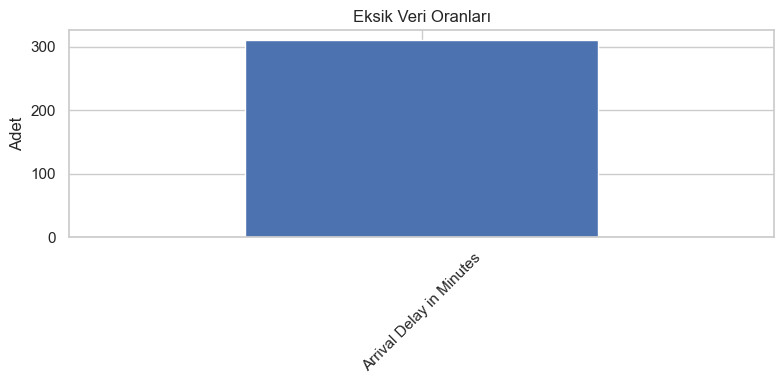

In [16]:
missing_counts.sort_values(ascending=False).plot(kind='bar', figsize=(8, 4))
plt.title("Eksik Veri Oranları")
plt.ylabel("Adet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Eksik Değerlerle Baş Etme Yöntemleri

Veri setindeki eksik değerler analiz ve modelleme süreçlerinde sorun yaratabilir. Bu nedenle eksik değerlerle başa çıkmak önemlidir. Kullanılabilecek bazı yöntemler:

- **Ortalama ile doldurma (mean)**: Sayısal verilerde yaygın olarak tercih edilir. Aykırı değer çoksa medyan daha güvenlidir.
- **Medyan ile doldurma**: Ortalama yerine daha dayanıklı bir alternatiftir.
- **En sık gözlenen değer ile doldurma (mode)**: Kategorik veriler için tercih edilir.
- **Satırları silme**: Eksik değer oranı çok düşükse kullanılabilir.
- **İleri düzey yöntemler**: Tahmine dayalı doldurma, regresyon, KNN imputation gibi yöntemler de vardır ama bu projede basit yöntemler tercih edilmiştir.

Aşağıdaki örnekte "Arrival Delay in Minutes" sütunundaki eksik değerleri ortalama ile dolduruyoruz ve değişimin histogram üzerindeki etkisini gözlemliyoruz.


Önce: Eksik değer sayısı = 310


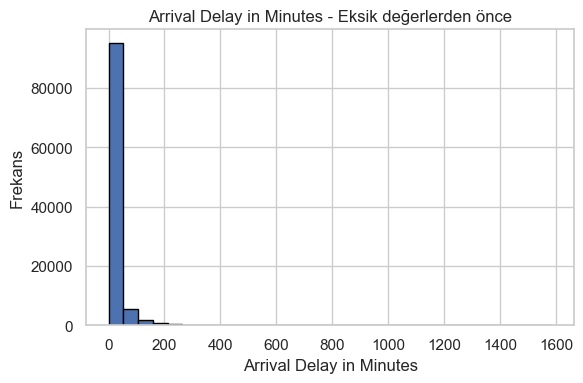

Sonra: Eksik değer sayısı = 0


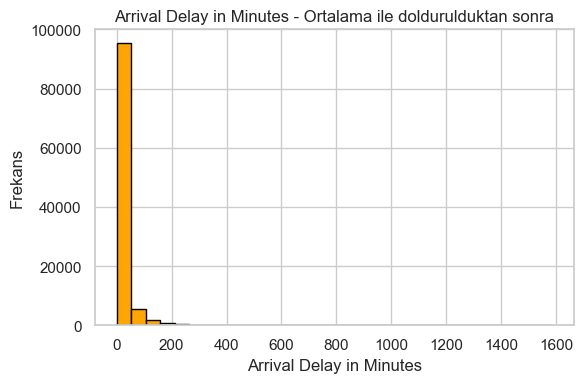

In [17]:
df_filled = df.copy()

column = "Arrival Delay in Minutes"

print(f"Önce: Eksik değer sayısı = {df[column].isnull().sum()}")

plt.figure(figsize=(6, 4))
df[column].hist(bins=30, edgecolor='black')
plt.title(f"{column} - Eksik değerlerden önce")
plt.xlabel(column)
plt.ylabel("Frekans")
plt.tight_layout()
plt.show()

# Ortalama ile doldurma
mean_val = df[column].mean()
df_filled[column] = df_filled[column].fillna(mean_val)

print(f"Sonra: Eksik değer sayısı = {df_filled[column].isnull().sum()}")

# Histogram (doldurduktan sonra)
plt.figure(figsize=(6, 4))
df_filled[column].hist(bins=30, edgecolor='black', color="orange")
plt.title(f"{column} - Ortalama ile doldurulduktan sonra")
plt.xlabel(column)
plt.ylabel("Frekans")
plt.tight_layout()
plt.show()


## 8. Aykırı Değer Analizi ve Görselleştirilmesi

Sayısal sütunlarda aykırı değerleri belirlemek için IQR (Interquartile Range) yöntemi kullanıyoruz. Aşağıdaki grafiklere baktığımızda özellikle gecikme süresi (Arrival Delay in Minutes) değerinde aykırı değerlerin yoğun olduğunu görüyoruz.

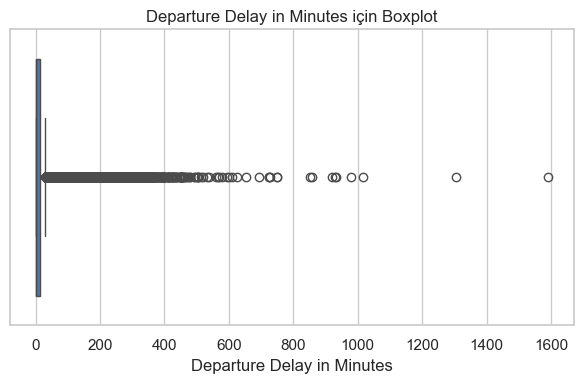

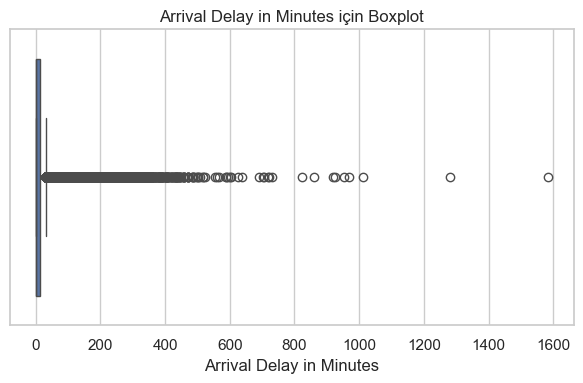

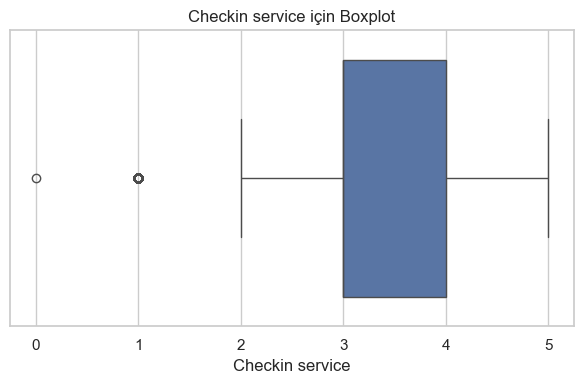

In [19]:
# Basit IQR yöntemiyle aykırı değer kontrolü
def count_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((df[col] < lower) | (df[col] > upper)).sum()

outlier_summary = {col: count_outliers(col) for col in numeric_cols}
sorted(outlier_summary.items(), key=lambda x: x[1], reverse=True)

top_outlier_cols = sorted(outlier_summary, key=outlier_summary.get, reverse=True)[:3]

for col in top_outlier_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} için Boxplot")
    plt.tight_layout()
    plt.show()


## 9. Sayısal Değişkenlerin Dağılımı (Histogramlar)

Her bir sayısal değişkenin dağılımını histogramlarla inceliyoruz. Bu grafikler değişkenlerin çarpıklığı ve dağılım özellikleri hakkında bilgi verir.

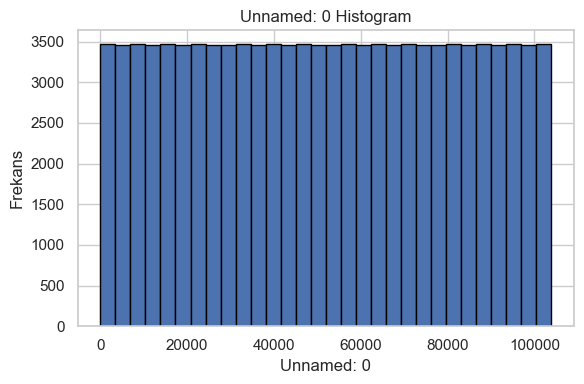

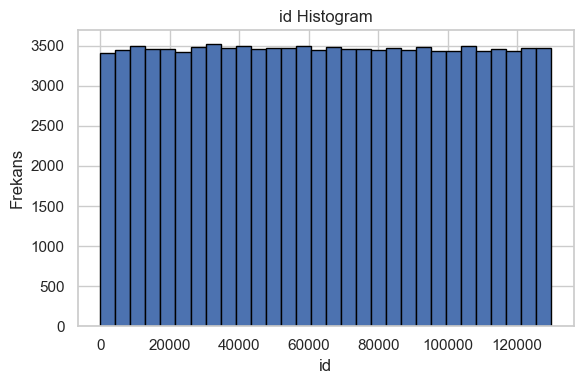

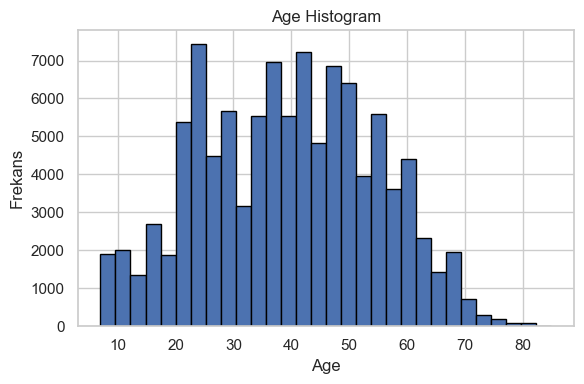

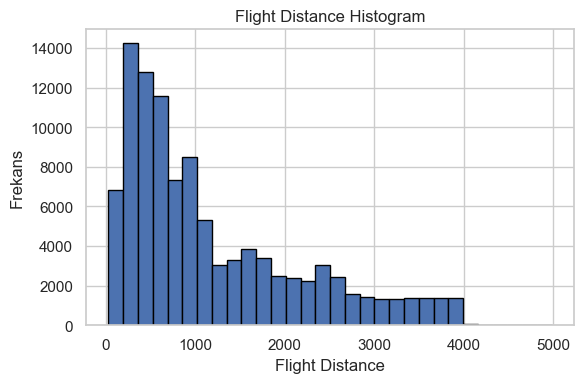

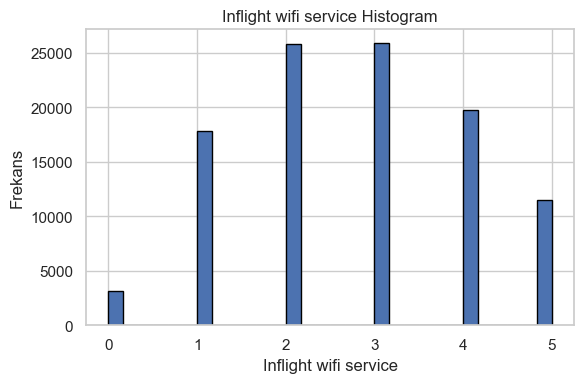

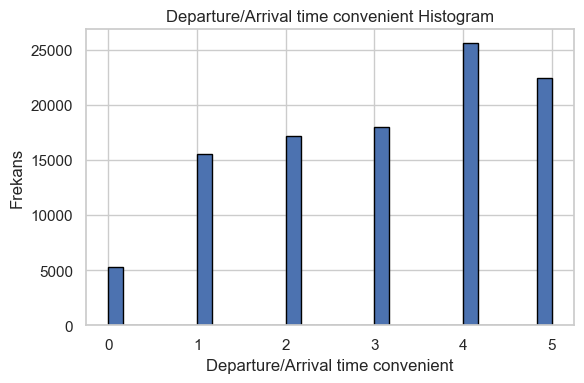

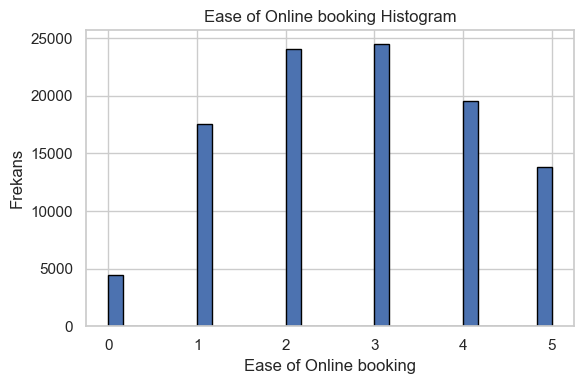

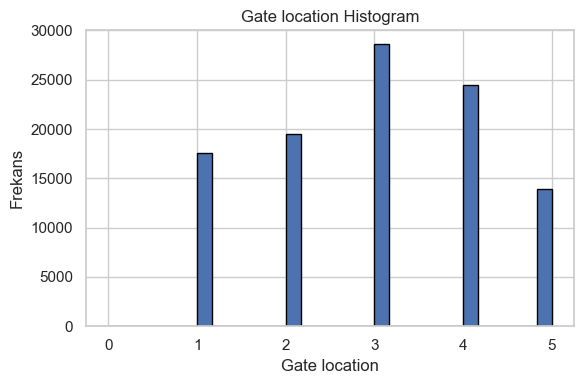

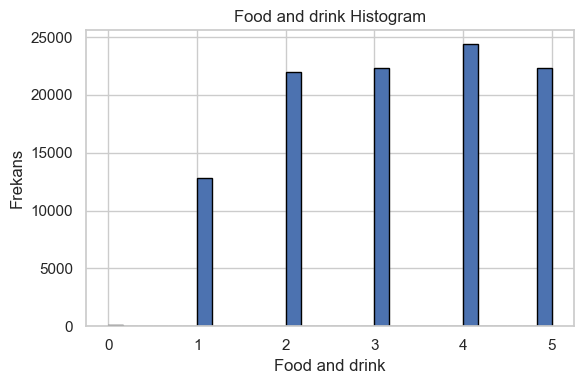

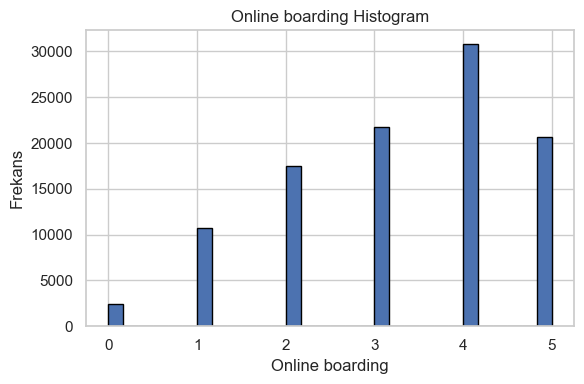

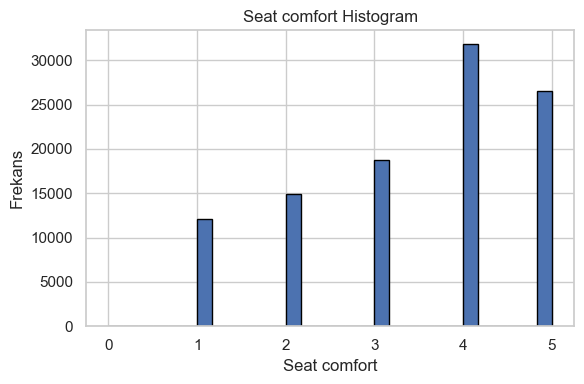

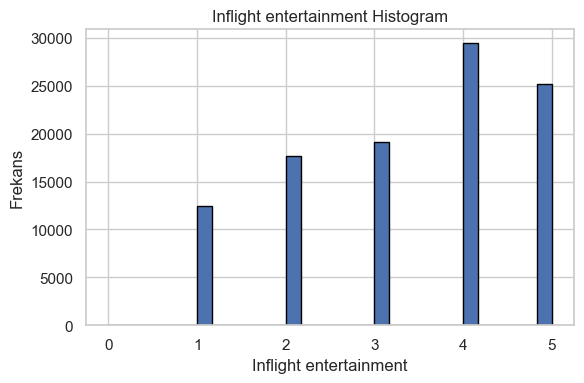

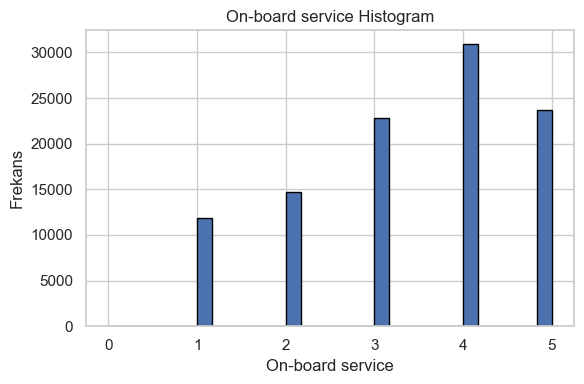

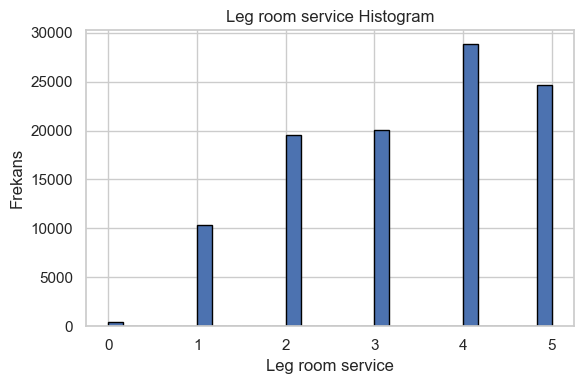

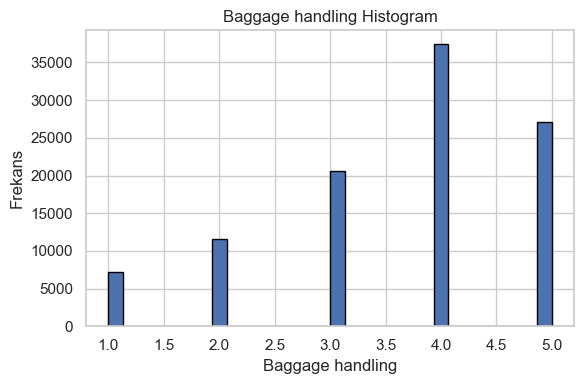

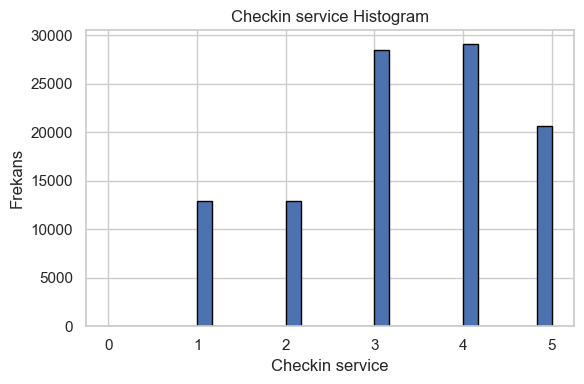

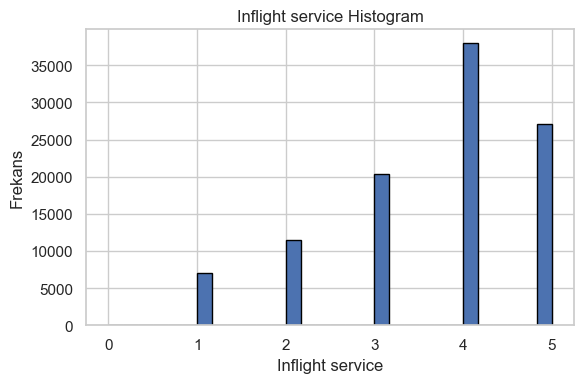

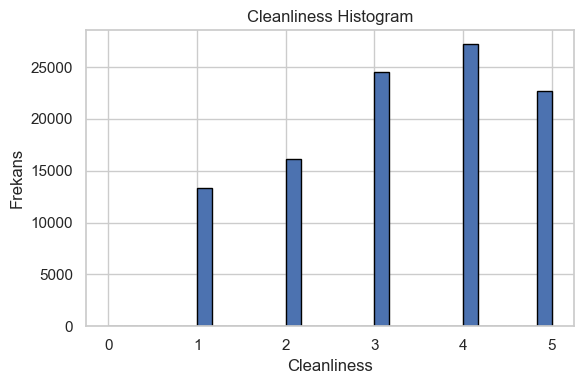

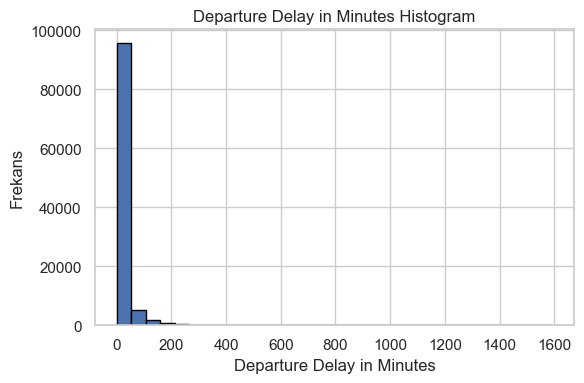

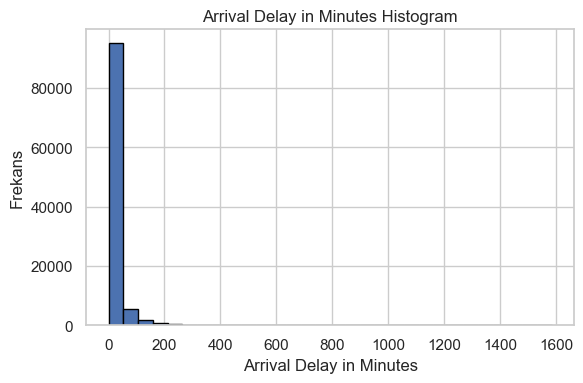

In [20]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    df[col].hist(bins=30, edgecolor='black')
    plt.title(f"{col} Histogram")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.tight_layout()
    plt.show()

## 10. Kategorik Değişkenlerin Dağılımı

Bar grafikleri ile kategorik değişkenlerin sınıf dağılımlarını görselleştiriyoruz. Bu sayede örneğin "memnun" ve "memnun değil" yolcu sayılarının oranı gibi bilgiler elde edebiliriz.

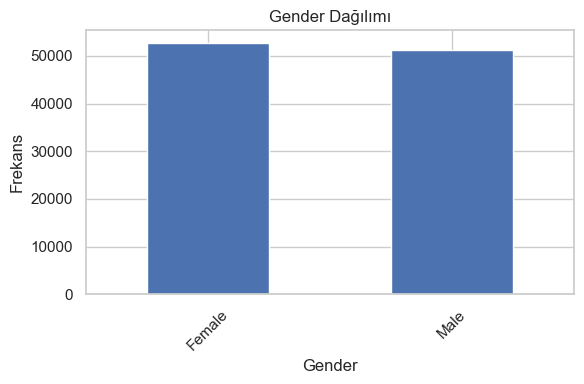

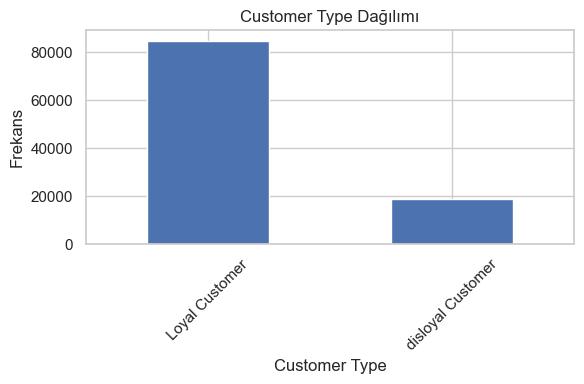

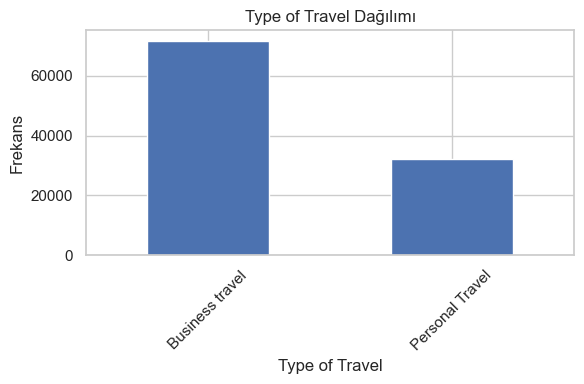

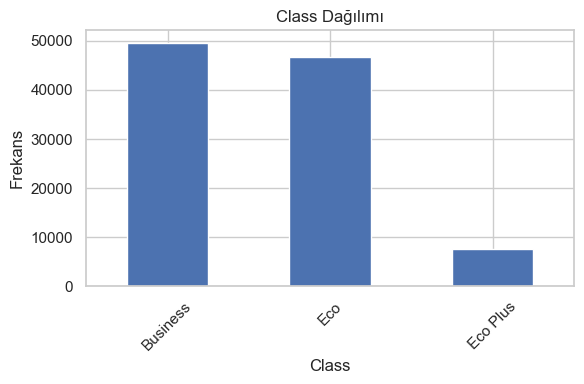

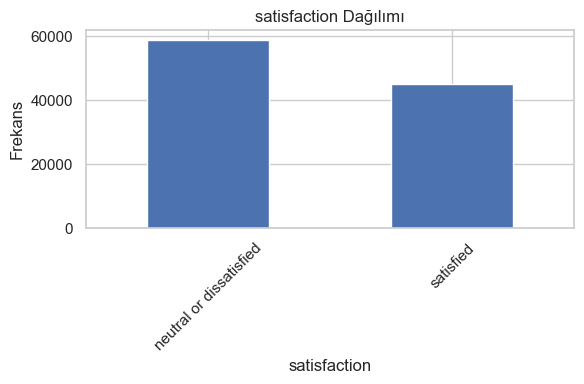

In [21]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f"{col} Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 11. Sonuçlar

- Veri setinde sadece "Arrival Delay in Minutes" sütununda az sayıda eksik değer vardı.
- Hizmet kalitesine dair puanlar genel olarak ortalamanın üzerinde.
- Gecikme süresi gibi sütunlarda bazı uç değerler bulunmakta.